<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [835]:
# Libraries needed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import sklearn
import tensorflow as tf

%matplotlib inline

from imblearn.over_sampling import SMOTE
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

# Importing libraries for various metric scores and analysis
from sklearn.metrics import (
    accuracy_score,  # Accuracy metric
    confusion_matrix,  # Confusion matrix metric
    precision_score,  # Precision metric
    recall_score,  # Recall metric
    f1_score,  # F1 score metric
    precision_recall_curve,  # Precision-Recall curve
    auc,  # Area Under the Curve metric
    roc_auc_score,  # ROC-AUC score metric
    roc_curve,  # ROC curve
)

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [836]:
# Creating the data frame, data, to load the .csv to the notebook
data = pd.read_csv('bank-1.csv')

# Creating copy of the data frame, df, to keep the original data unaltered.
df = data.copy()

## Data Overview

In [837]:
# Shape of the data frame.
df.shape

(10000, 14)



*   Observed shape of data frame.



In [838]:
# First 5 rows of the data frame.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [839]:
# Last 5 rows of the data frame.
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [840]:
# Information about the data frame's columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* Observed data types of the columns.
* Observed no null values present in the data set.

In [841]:
# Checking the data frame for duplicate values.
df.duplicated().value_counts()

,count
False,10000


* Observed no duplicate values in the data set.

In [842]:
# Checking the data frame for na values.
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


* Observed no null values present in the data set.

In [843]:
# Statistical summary of the columns with data type of "Int64" and "Float64".
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


* Observed statistical summary of numerical data.

In [844]:
# Statistical summary of the columns with data type of "object".
df.describe(include=["object"]).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [845]:
# Checking the percentages of classes in the target variable column.
df['Exited'].value_counts(1)

,proportion
Exited,
0,0.7963
1,0.2037


In [846]:
# Dropping "RowNumber", "CustomerId", & "Surname" columns beacuse they are unnecessary information for analysis.
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [847]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [848]:
# Top 5 rows of the new data frame.
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [849]:
# Creating a list with column labels that need to be converted from "object" to "category" data type.
cat_cols = [
    'Geography',
    'Gender'
]

# Converting the columns with "object" data type to "category" data type.
df[cat_cols] = df[cat_cols].astype('category')

* Converting columns with object data type to categorical data type.


In [850]:
# Observing the data types of the new data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


* Observed the data types were successfully changed to categorical.


## Exploratory Data Analysis

**Functions to use for EDA**



In [851]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [852]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [853]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [854]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

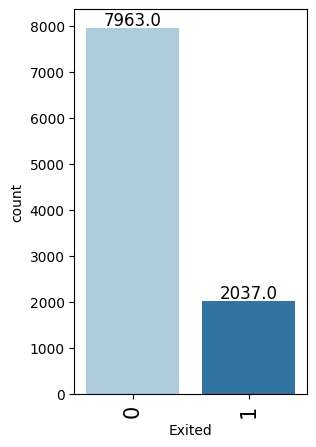

In [855]:
# Target variable
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, "Exited")

* Exited is the target variable


* Observed majority class of target variable is 0 - customers who have not exited the bank.

In [856]:
df['Exited'].value_counts(1)*100


,proportion
Exited,
0,79.63
1,20.37


* 79% of customers are existing customers.
* 20% of custsomers have exited.

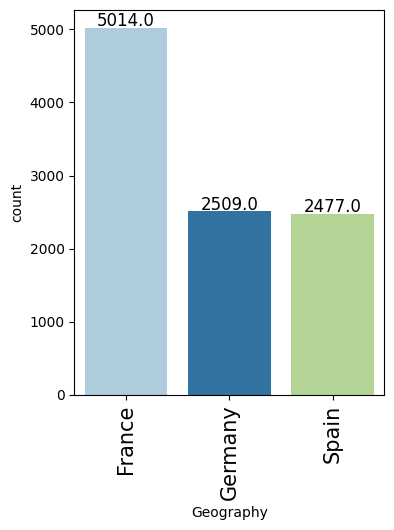

In [857]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, "Geography")

* Observed about half the customers are located in France.
* Observed about a quarter of customers are located in Germany.
* Observed about a quarter of customers are located in Spain.

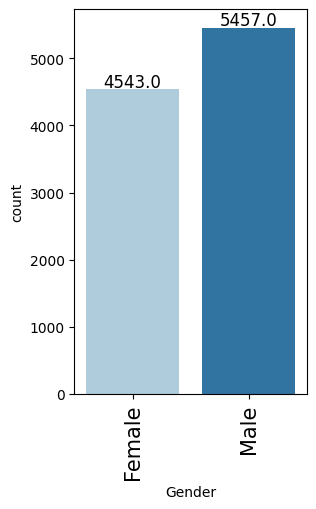

In [858]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, 'Gender')

In [859]:
df['Gender'].value_counts(1)


,proportion
Gender,
Male,0.5457
Female,0.4543


* Observed that most customers are male.
* Although males are the majority, 45% are females.

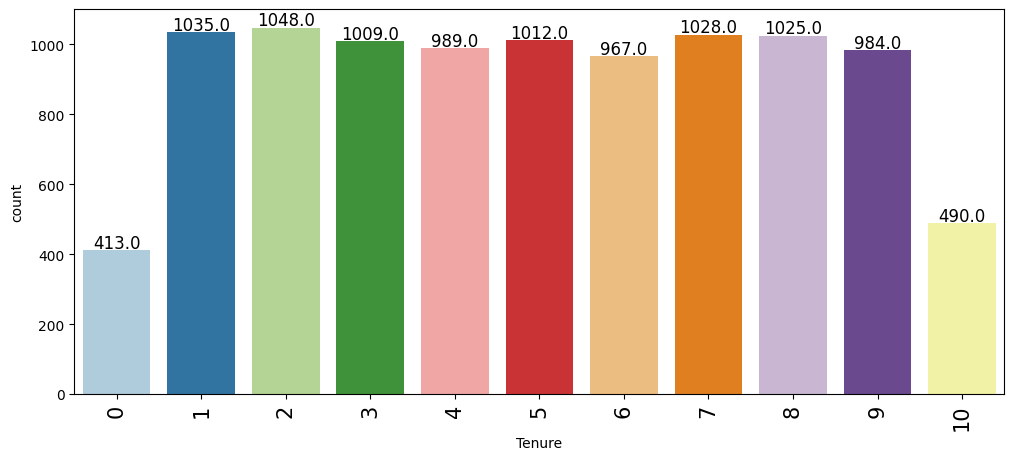

In [860]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, "Tenure")

* Observed tenure ranges from 0 to 10 years.
* There are many less customers with a tenure of 0 or 10 years compared to
*  other lengths of tenure.
* Tenure lengths of 1 to 9 make up the majority of tenure lengths.
* There are nearly equal amounts of customers with tenure from 1 to 9 years.

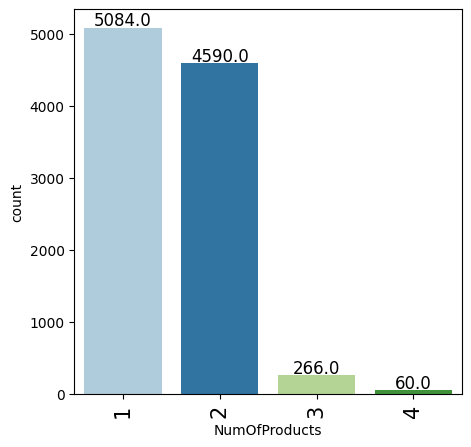

In [861]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, "NumOfProducts")

In [862]:
df['NumOfProducts'][df['NumOfProducts']>2].value_counts().sum()

326

* Observed the majority of customers have purchased 1 or 2 products with the bank.
* Observed only 326 customers have purchased more than 2 products with the bank.

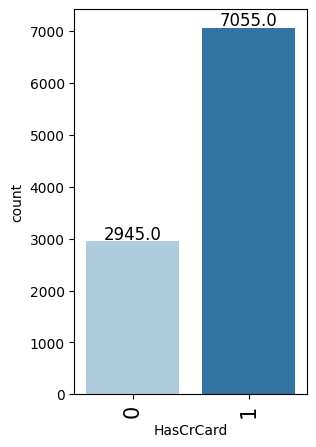

In [863]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, 'HasCrCard')

In [864]:
df['HasCrCard'].value_counts(1)

,proportion
HasCrCard,
1,0.7055
0,0.2945


* 70.6% of customers have a credit card.
* 29.4% of customers do not have a credit card.

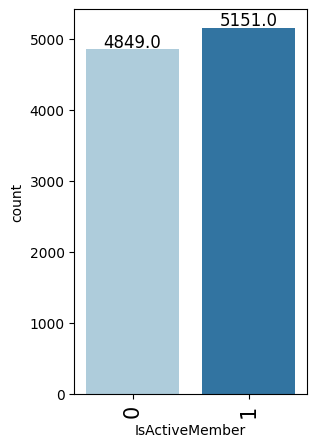

In [865]:
# Generating a labeled bar plot from predefined function.
labeled_barplot(df, 'IsActiveMember')

* Most customers are active members, but its nearly equally distributed.


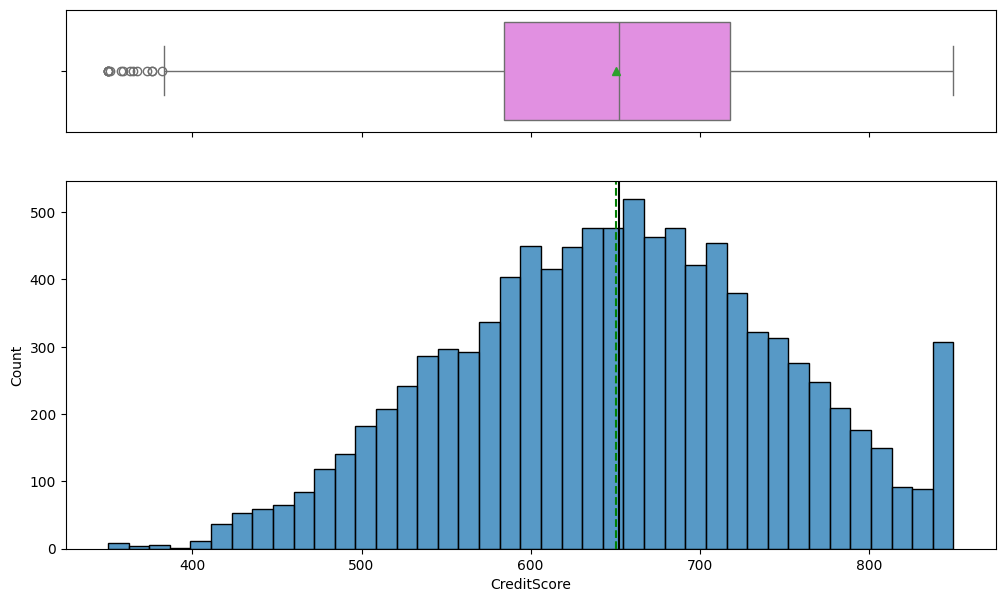

In [866]:
# Generating a histogram with boxplot from predefined function.
histogram_boxplot(df, "CreditScore")

* Customer's CreditScore has a median value of about 650, with a mean very slightly lower than that.
* The data is normally distributed with a slight left skew due to outliers.

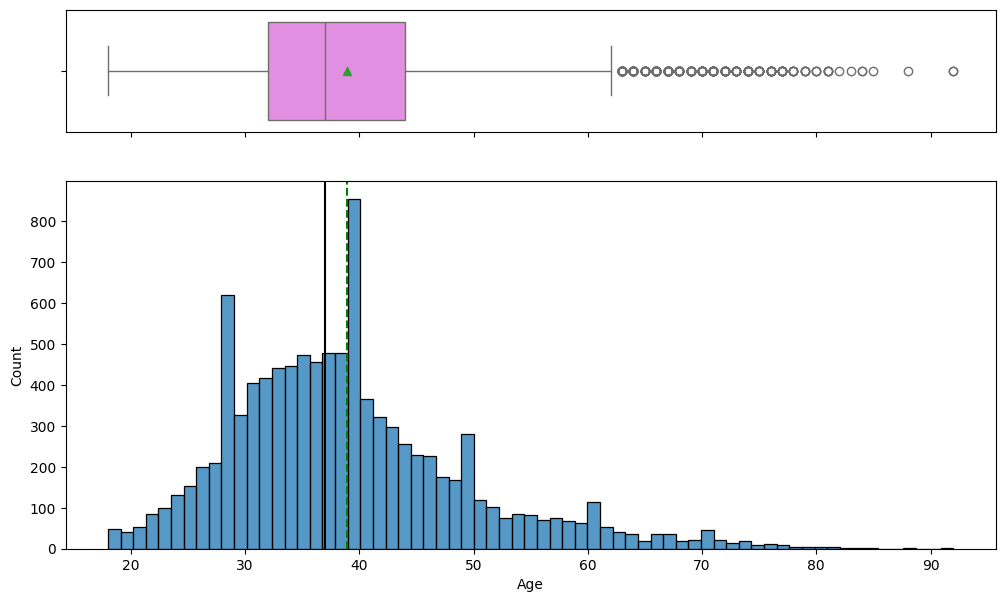

In [867]:
# Generating a histogram with boxplot from predefined function.
histogram_boxplot(df, "Age")

In [868]:
df['Age'].median()

37.0

In [869]:
df['Age'].mean()


38.9218

* Observed customers have a median age of 37 and a mean of 38.9 years old.
* Customers over age 62 are appearing as outliers and are right skewing the distribution.

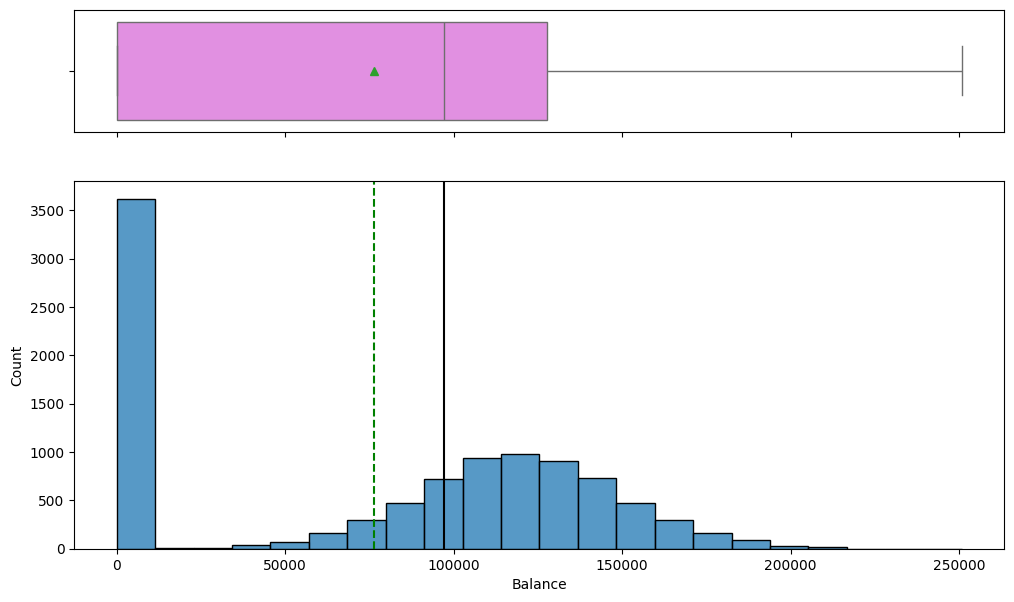

In [870]:
# Generating a histogram with boxplot from predefined function.
histogram_boxplot(df, "Balance")

In [871]:
df["Balance"].value_counts(1).head(5)*100

,proportion
Balance,
0.00,36.17
130170.82,0.02
105473.74,0.02
159397.75,0.01
144238.70,0.01


* Observed that 36% of customers have a balance of 0.
* These customers are left skewing the distribution.
* The median balance is almost 100k.

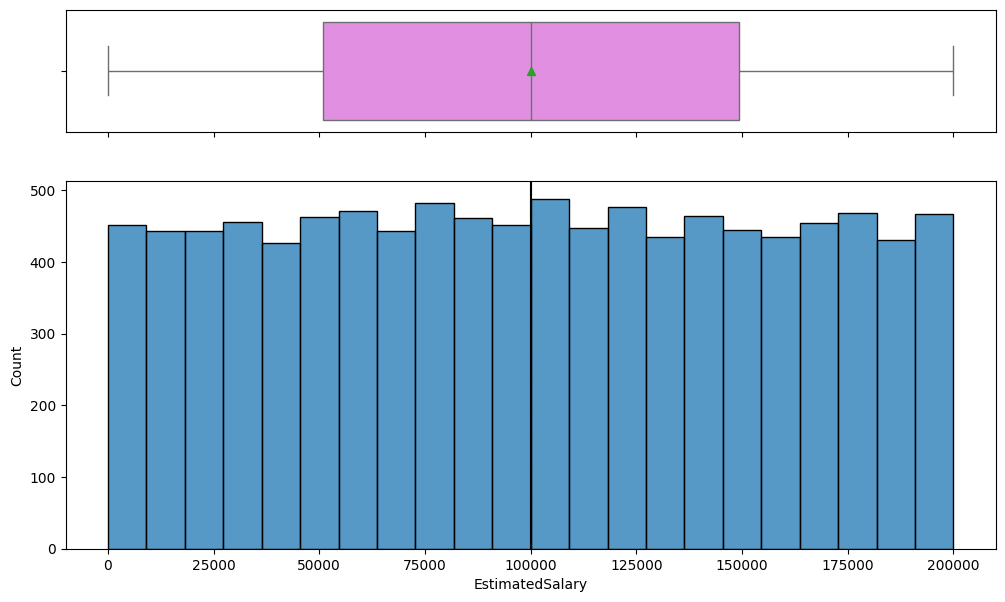

In [872]:
# Generating a histogram with boxplot from predefined function.
histogram_boxplot(df, 'EstimatedSalary')

* Customers' EstimatedSalary is evenly distibuted from 0 to 200k.
* No outliers present.

### Bivariate Analysis

In [873]:
df = data.copy()

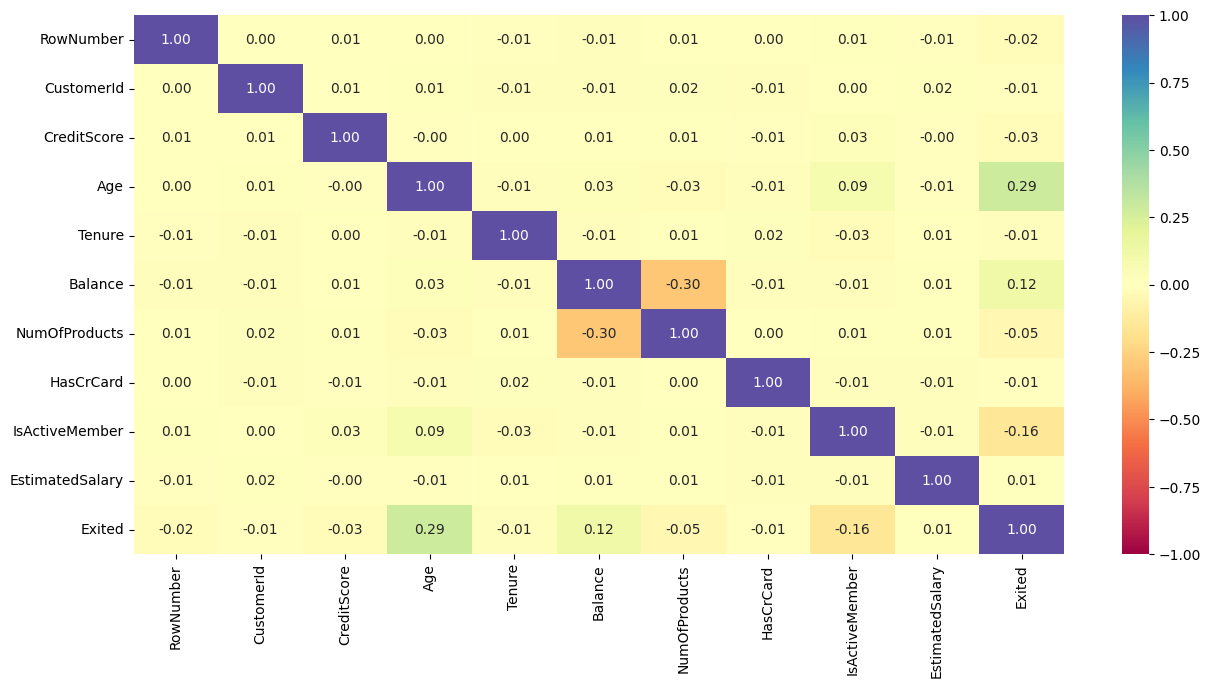

In [874]:
# Created a correlation matrix to show any correlations between non-categorical columns.
# Values of 1 are highly positively correlated, values of -1 are highly negatively correlated.
df.drop("Geography", axis=1, inplace=True)
df.drop("Gender", axis=1, inplace=True)
df.drop("Surname", axis=1, inplace=True)

plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* No significant correlation exists between variables.
* There is some slight positive correlation between Age and Exited.
* There is some slight negative correlation between Balance and NumOfProducts.

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
9        771   213    984
3        796   213   1009
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


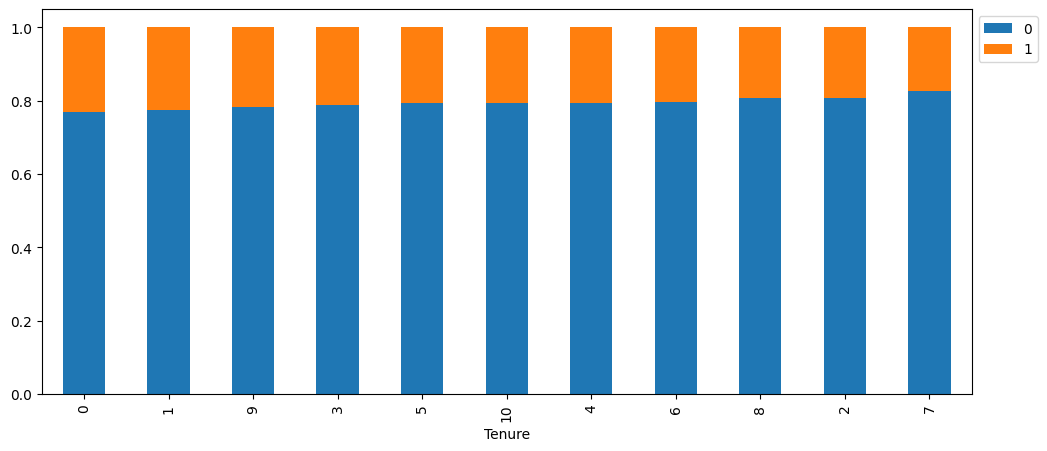

In [875]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'Tenure', 'Exited')

* Observed class ratios are very similar between different tenure lengths.


Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


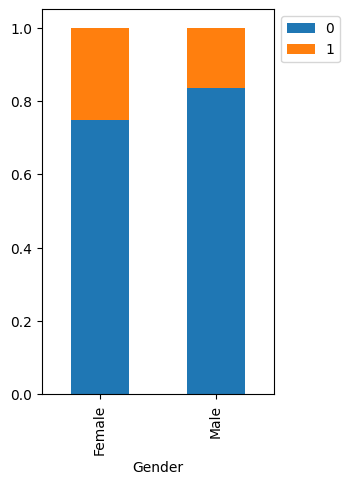

In [876]:
df=data.copy()

# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'Gender', 'Exited')

* Observed slightly more females have exited than men.
* Although more females have exited, the number of men who have exited is similar.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


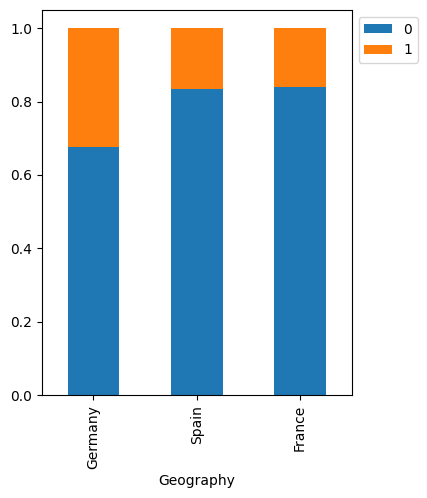

In [877]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'Geography', 'Exited')

* Observed a larger ratio of customers located in Germany have exited than customers located in other countries.
* Customers who are located in Spain and France have a similar exit ratio.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


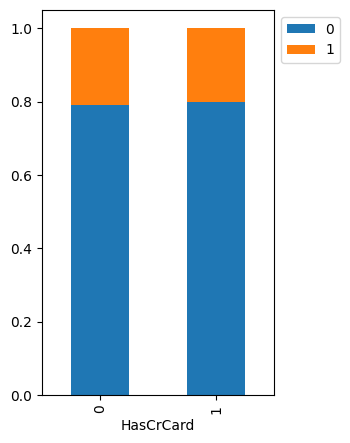

In [878]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'HasCrCard', 'Exited')

* Observed class ratios are very similar between customers who have credit cards and those who do not have credit cards.


Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


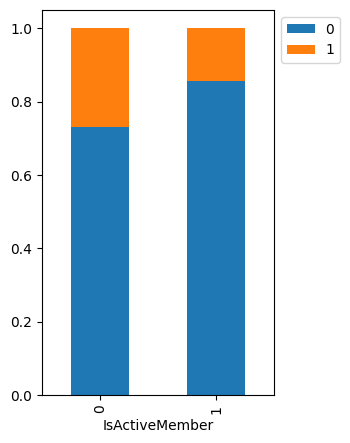

In [879]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'IsActiveMember', 'Exited')

* Observed that customers who are not considered to be active members exit at a higher rate than customers who are considered active members.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


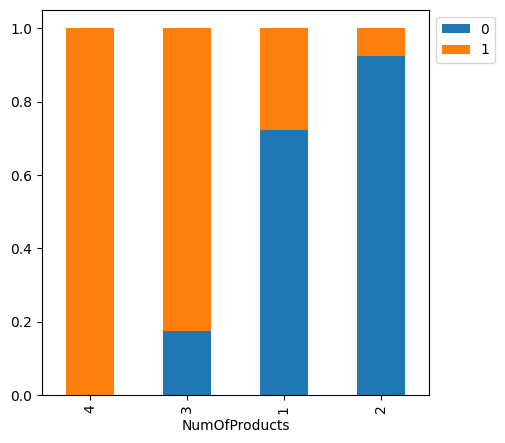

In [880]:
# Generating a stacked barplot from predefined function.
stacked_barplot(df, 'NumOfProducts', 'Exited')

* All customers who purchased 4 products from the bank have exited.
* The majority of customers who purchased 3 products from the bank have exited.
* Customers who have purchased 1 or 2 products from the bank are exiting at much lower rates.
* Customers who have purchased 2 products from the bank are least likely to leave.

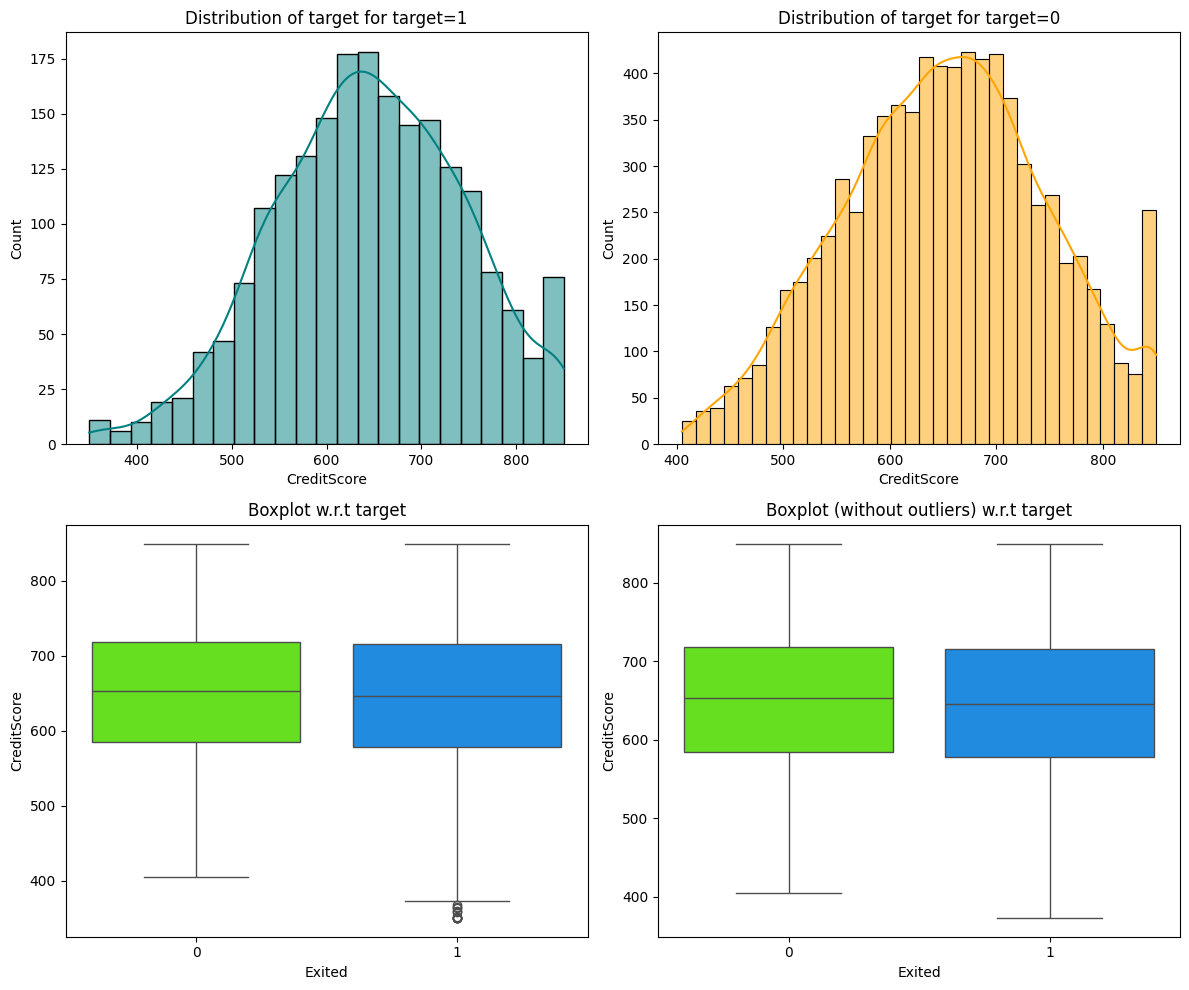

In [881]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "CreditScore", "Exited")

* The distributions of CreditScore for customers who have exited and customers who have not exited are very similar.
* The box plots of CreditScore for customers who have exited and customers who have not exited are nearly identical.
* The minimum CreditScore of customers who have exited is lower than the min CreditScore of customers who have not exited.

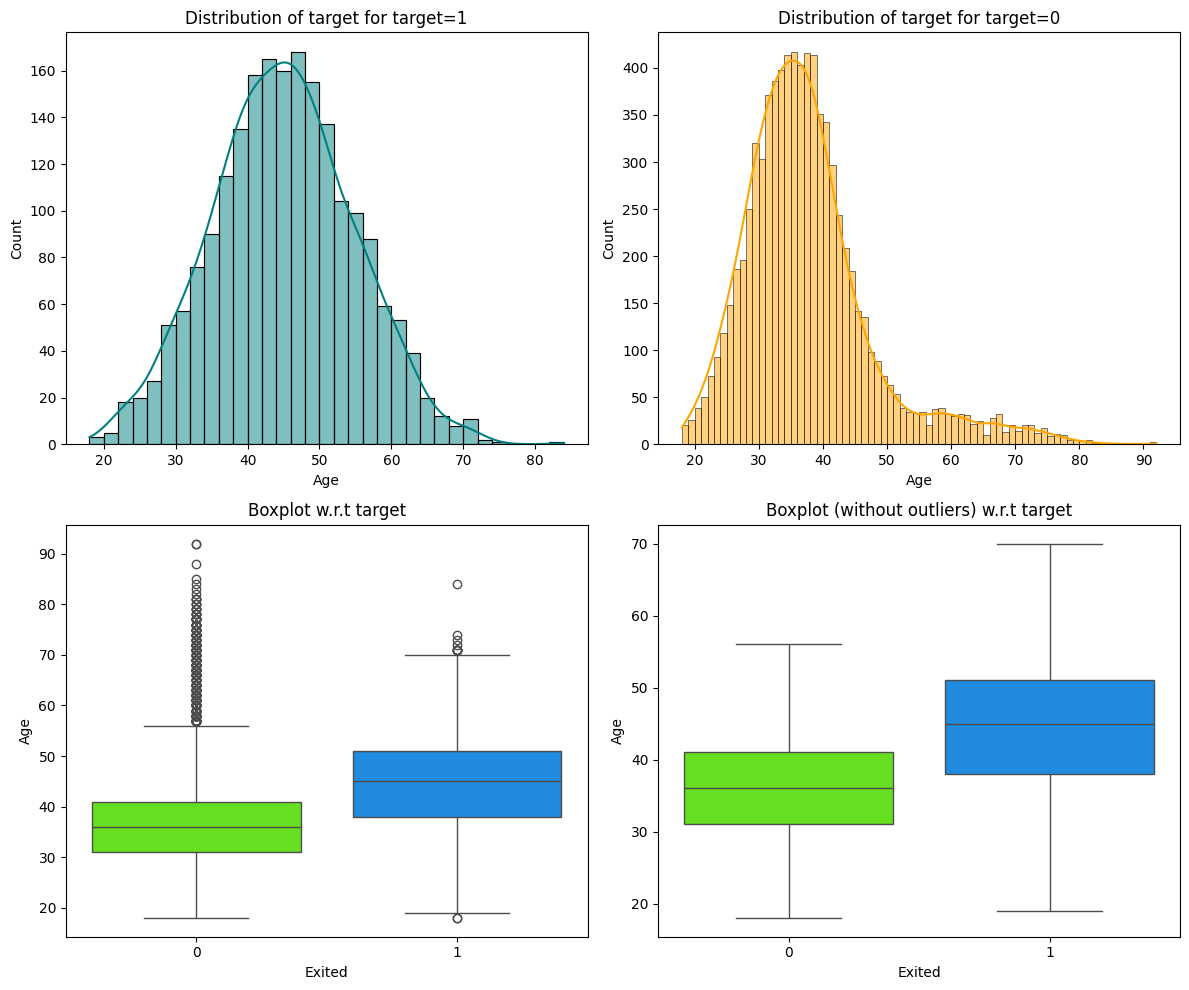

In [882]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "Age", "Exited")

* Observed the median age of customers who have exited is about 45, whereas the median age of customers who have not exited is about 35.
* Observed the max age of customers who have exited is much greated than the max age of customers who have not exited if outliers are ignored.

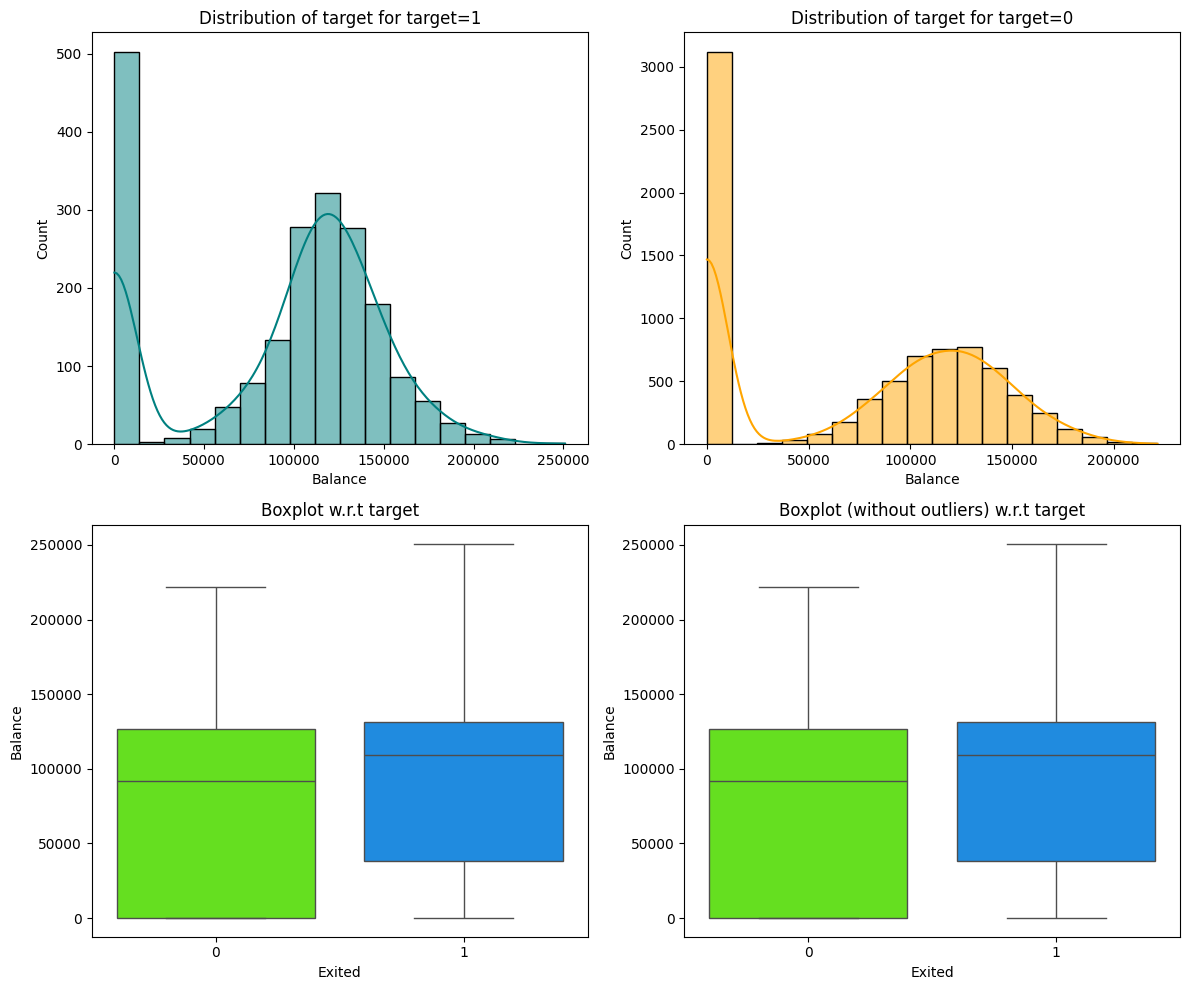

In [883]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "Balance", "Exited")

* Observed that the distribution of account balance for customers who have exited and customers who have not exited is very similar.
* Observed that the peak of the distribution of account balance for customers who have exited is much higher than that of the same distribution for customers who have not exited.
* Observered the max account balance of customers who have exited is higher than the account balance of customers whoe have not exited.

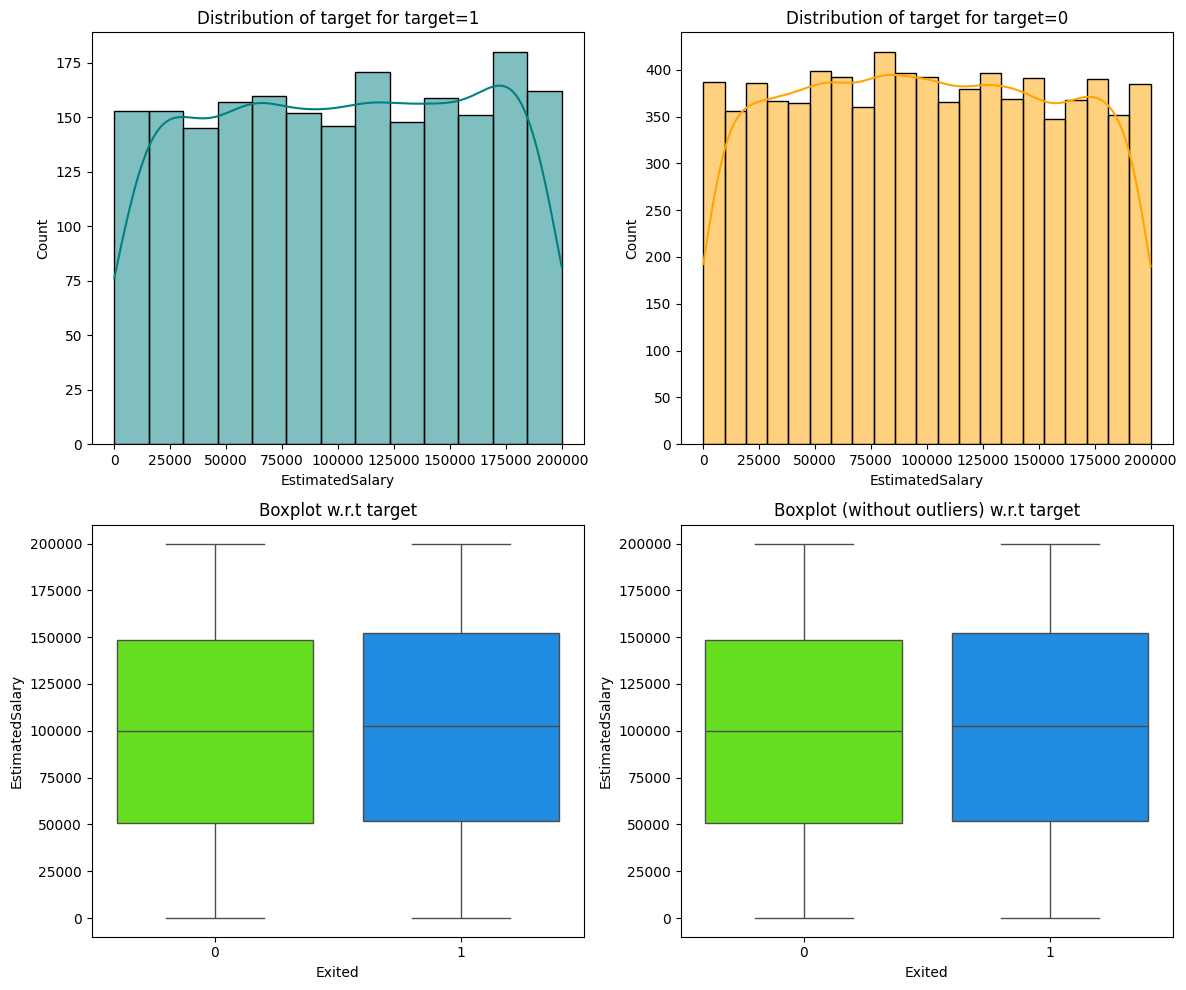

In [884]:
# Generating distribution plots for each target class from predefined function.
distribution_plot_wrt_target(df, "EstimatedSalary", "Exited")

* Observed that the distribution of EstimatedSalary for customers who have exited and customers who have not exited is nearly identical.
* Observed that the box plots of EstimatedSalary for customers who have exited and customers who have not exited is nearly identical.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**Missing Value and Duplicate Data Treatment:**

There are no missing and duplicated values in the dataset, and hence it doesn't require any treatment.

**Outlier Removal**

Outliers are present in Age and CreditScore. However, people with ages or credit ratings that differ greatly from the average are frequently encountered in real-world situations, and these differences can offer important insights into the complexity and diversity of the data. Hence we will keep the outliers

### Outlier Detection

In [885]:
df=data.copy()

#Dropping Unique value columns

df.drop("RowNumber", axis=1, inplace=True)
df.drop("CustomerId", axis=1, inplace=True)
df.drop("Surname", axis=1, inplace=True)

In [886]:
# Splitting the Data
X_data = df.drop(["Exited"], axis=1)

# target variable
y_data = df["Exited"]  # target variable

In [887]:
# Creating dummy variables for the 2 the categorical variables
X_data = pd.get_dummies(X_data, columns=["Geography", "Gender"],drop_first=True)
X_data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
5,645,44,8,113755.78,2,1,0,149756.71,False,True,True
6,822,50,7,0.00,2,1,1,10062.80,False,False,True
7,376,29,4,115046.74,4,1,0,119346.88,True,False,False
8,501,44,4,142051.07,2,0,1,74940.50,False,False,True
9,684,27,2,134603.88,1,1,1,71725.73,False,False,True


In [888]:
X_data.shape


(10000, 11)

* It was determined not necessary to treat any outliers.
* Although some values are outside the outlier range, these values are determined as significant for analysis.

### Train-validation-test Split

* Split data into independent and dependent variables.

In [889]:
from sklearn.model_selection import train_test_split

# Splitting the data up in train, validation and test sets


X_temp, X_test, y_temp, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1, stratify=y_data)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_temp)

In [890]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6400, 11)
Shape of X_val: (1600, 11)
Shape of X_test: (2000, 11)
Shape of y_train: (6400,)
Shape of y_val: (1600,)
Shape of y_test: (2000,)


* Split data into training, validation, and test sets.
* Models will be trained on training data, and evaluated on validation data.
* The best models will be tuned and finally evaluated on the test data.

### Data Normalization

In [891]:
# Specifying columns to scale
columns_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

# Create a scaler
scaler = StandardScaler()

# Fiting on the training set
scaler.fit(X_train[columns_to_scale])

# Transforming the training set
X_train[columns_to_scale] = scaler.transform(X_train[columns_to_scale])

# Transforming the validation and test sets
X_val[columns_to_scale] = scaler.transform(X_val[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

* Normalized numerical data to reduce bias of larger numbers.


In [892]:
X_train.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5292,0.976155,-1.047381,0.347046,-1.212523,2,1,0,0.939366,False,False,False
3879,1.316949,-0.572048,1.377238,1.214872,2,0,0,1.389376,False,False,False
6118,-0.190810,0.949016,0.003649,1.473810,1,0,0,0.692477,False,False,False
4044,0.077695,-0.667115,1.033841,-1.212523,1,1,1,-0.347954,False,False,True
3202,-0.893054,-0.572048,-0.339749,0.961751,1,1,0,-0.647963,False,False,False
6142,1.079426,-0.096715,-1.369941,-1.212523,2,1,0,-1.386390,False,False,False
7804,0.346200,1.899682,1.377238,0.746234,1,0,1,-1.472138,True,False,True
9731,-0.448988,-0.952314,0.690443,0.428567,1,1,0,1.093685,True,False,True
9086,-0.035903,-0.952314,-1.026544,-1.212523,2,1,0,1.368194,False,True,False
2539,-0.686511,0.663817,0.347046,0.184697,2,1,0,0.347509,True,False,False


In [893]:
# Printing shape of new data frames.
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (6400,)
Shape of y_val: (1600,)
Shape of y_test: (2000,)


In [894]:
# Checking information of new data frame's columns.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6400 entries, 5292 to 4847
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6400 non-null   float64
 1   Age                6400 non-null   float64
 2   Tenure             6400 non-null   float64
 3   Balance            6400 non-null   float64
 4   NumOfProducts      6400 non-null   int64  
 5   HasCrCard          6400 non-null   int64  
 6   IsActiveMember     6400 non-null   int64  
 7   EstimatedSalary    6400 non-null   float64
 8   Geography_Germany  6400 non-null   bool   
 9   Geography_Spain    6400 non-null   bool   
 10  Gender_Male        6400 non-null   bool   
dtypes: bool(3), float64(5), int64(3)
memory usage: 468.8 KB


In [895]:
# Checking information of new data frame's columns.
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 6919 to 6051
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        1600 non-null   float64
 1   Age                1600 non-null   float64
 2   Tenure             1600 non-null   float64
 3   Balance            1600 non-null   float64
 4   NumOfProducts      1600 non-null   int64  
 5   HasCrCard          1600 non-null   int64  
 6   IsActiveMember     1600 non-null   int64  
 7   EstimatedSalary    1600 non-null   float64
 8   Geography_Germany  1600 non-null   bool   
 9   Geography_Spain    1600 non-null   bool   
 10  Gender_Male        1600 non-null   bool   
dtypes: bool(3), float64(5), int64(3)
memory usage: 117.2 KB


In [896]:
# Checking information of new data frame's columns.
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 4466 to 8350
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   float64
 1   Age                2000 non-null   float64
 2   Tenure             2000 non-null   float64
 3   Balance            2000 non-null   float64
 4   NumOfProducts      2000 non-null   int64  
 5   HasCrCard          2000 non-null   int64  
 6   IsActiveMember     2000 non-null   int64  
 7   EstimatedSalary    2000 non-null   float64
 8   Geography_Germany  2000 non-null   bool   
 9   Geography_Spain    2000 non-null   bool   
 10  Gender_Male        2000 non-null   bool   
dtypes: bool(3), float64(5), int64(3)
memory usage: 146.5 KB


In [897]:
# Checking information of new data frame's columns.
y_train.info()

<class 'pandas.core.series.Series'>
Index: 6400 entries, 5292 to 4847
Series name: Exited
Non-Null Count  Dtype
--------------  -----
6400 non-null   int64
dtypes: int64(1)
memory usage: 100.0 KB


In [898]:
# Checking information of new data frame's columns.
y_val.info()

<class 'pandas.core.series.Series'>
Index: 1600 entries, 6919 to 6051
Series name: Exited
Non-Null Count  Dtype
--------------  -----
1600 non-null   int64
dtypes: int64(1)
memory usage: 25.0 KB


In [899]:
# Checking information of new data frame's columns.
y_test.info()

<class 'pandas.core.series.Series'>
Index: 2000 entries, 4466 to 8350
Series name: Exited
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 31.2 KB


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


In [900]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [901]:
def metrics_matrix(cf, sum_stats=True):

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "  Accuracy={:0.3f}\tPrecision={:0.3f}\tRecall={:0.3f}\tF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    return stats_text


### Neural Network with SGD Optimizer

In [902]:
import keras

from keras.models import Sequential
from keras.layers import Dense

# initializing the model
model = Sequential()

#input layer
model.add(Dense(units=32, activation='relu', input_dim=11))

#hidden layer
model.add(Dense(units=64, activation='relu'))

#output layer
model.add(Dense(1, activation='sigmoid'))

In [903]:
# Creating the model with SGD optimizer with default learning rate and recall as the metric
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

In [904]:
# Checking the summary of the model.
model.summary()

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_128 (Dense)                    │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [905]:
X_train = X_train.astype(int)
X_val = X_val.astype(int)
X_test = X_test.astype(int)

y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

In [906]:
history = model.fit(X_train, y_train, epochs=50,validation_data=(X_val, y_val), batch_size=32)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.5952 - recall_36: 0.0403 - val_loss: 0.5065 - val_recall_36: 0.0000e+00
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5094 - recall_36: 0.0000e+00 - val_loss: 0.4941 - val_recall_36: 0.0000e+00
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4985 - recall_36: 0.0000e+00 - val_loss: 0.4855 - val_recall_36: 0.0000e+00
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4902 - recall_36: 0.0000e+00 - val_loss: 0.4781 - val_recall_36: 0.0000e+00
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4831 - recall_36: 0.0000e+00 - val_loss: 0.4715 - val_recall_36: 0.0000e+00
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4769 - recall_36: 0.0000e+00 - val_loss: 0.4658 - val_recall_36: 0.0031
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4717 - recall_36: 0.0035 - val_loss: 0.4607 - val_recall_36: 0.0061
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/st

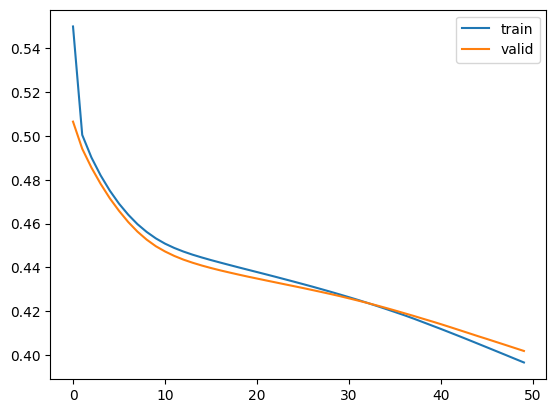

In [907]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

Since the learning curves (training and validation) closely follow each other across epochs, it indicates that the model is likely generalizing well to both the training and validation datasets.

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


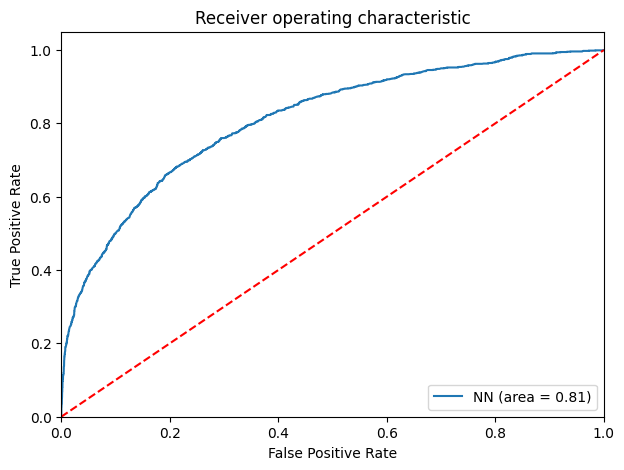

In [908]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train.astype(float), model.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


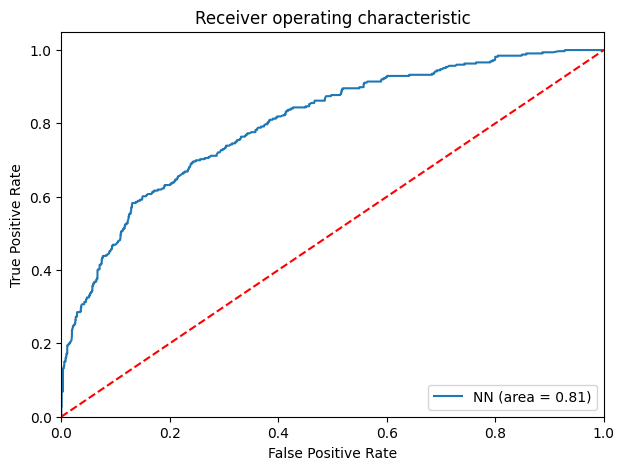

In [909]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [910]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.21567754


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


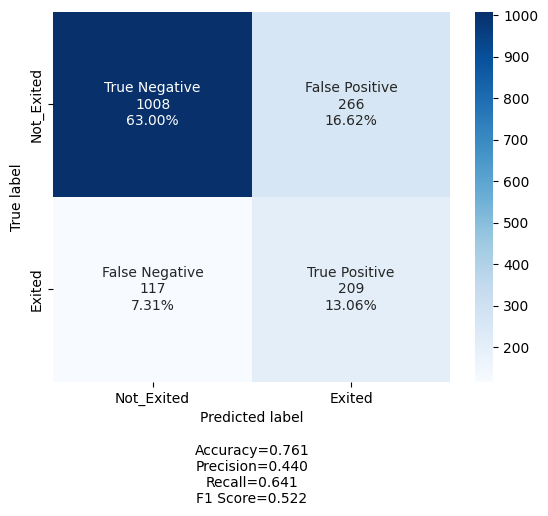

In [911]:
# Predictions on validation set
y_pred_val = model.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

mat = metrics_matrix(cm_val)

# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")

1.  Accuracy (0.761): This is the proportion of total predictions that the model got right. In this case, the model correctly predicted whether a customer will leave the bank or not about 76.1% of the time.

2.  Precision (0.440): This is the proportion of positive identifications (i.e., a customer will leave the bank) that were actually correct.When the model predicted that a customer will leave the bank, it was correct only about 44% of the time.

3.  Recall (0.641): This is the proportion of actual positives that were identified correctly. In this case, the model correctly identified 64.1% of the customers who actually left the bank.

4.  F1 Score (0.522): F1 Score is approximately 0.52, which is not very high.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [912]:
#Initializing the neural network
model1 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model1.add(Dense(32,activation='relu',input_dim = 11))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model1.add(Dense(16,activation='relu'))

# Adding the output layer
model1.add(Dense(1, activation = 'sigmoid'))

In [913]:
# Compiling the model

model1.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])


In [914]:
# Checking the summary of the model.
model1.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_131 (Dense)                    │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [915]:
#Importing classback API
from keras import callbacks

# Define early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

history1 = model1.fit(X_train,y_train,batch_size=32,epochs=50,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])
print("*" * 130)
print("Model has been fit to training data.")

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5839 - recall_37: 0.2100 - val_loss: 0.4554 - val_recall_37: 0.0368
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4613 - recall_37: 0.0888 - val_loss: 0.4423 - val_recall_37: 0.1074
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4501 - recall_37: 0.1361 - val_loss: 0.4376 - val_recall_37: 0.1258
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4429 - recall_37: 0.1563 - val_loss: 0.4326 - val_recall_37: 0.1380
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4352 - recall_37: 0.1839 - val_loss: 0.4266 - val_recall_37: 0.1595
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4262 - recall_37: 0.2267 - val_loss: 0.4189 - val_recall_37: 0.1748
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4159 - recall_37: 0.2430 - val_loss: 0.4103 - val_recall_37: 0.2147
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4054 - recall_37: 0.2906 - v

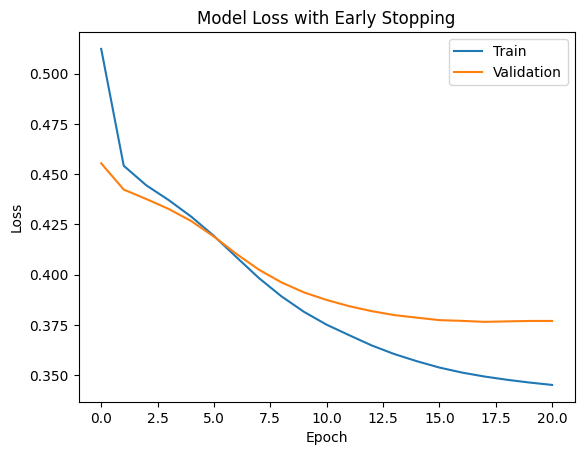

In [916]:
# Plot training loss and validation loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**Observations:**

-The increasing gap validation loss curve between train and suggests that the model is continuing to improve its fit to the training data, but these improvements are not translating to the validation data.

-This could be a sign of overfitting.

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


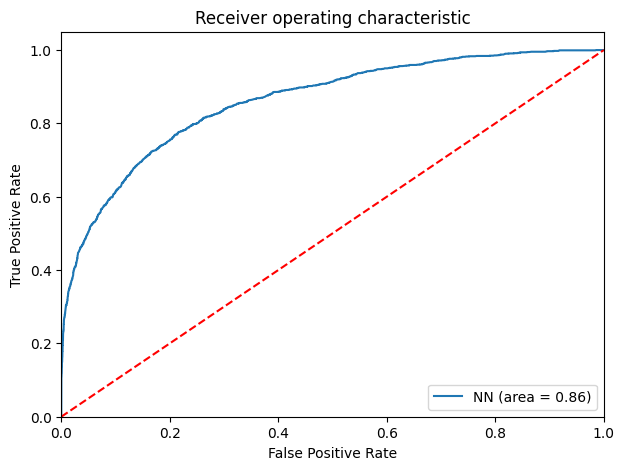

In [917]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train.astype(float), model1.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model1.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


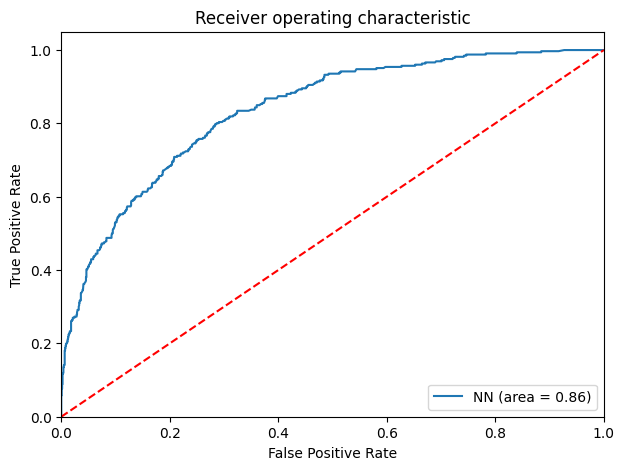

In [918]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model1.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model1.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()


**Observations:**

-Training loss decreases steadily as the number of epochs increases. This indicates that the model is learning and improving its performance on the training data over time.

-The validation loss, which also decreases initially but starts to plateau and diverge from the training loss around epoch 10. This could suggest that the model is beginning to overfit the training data.

In [919]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model1.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.17634209


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


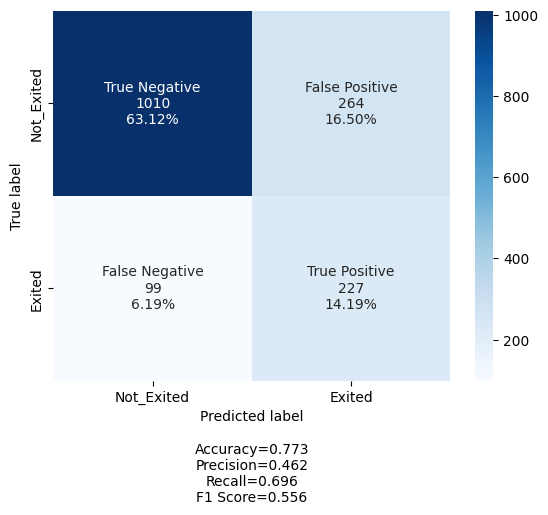

In [920]:
# Predictions on validation set
y_pred_val = model1.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

mat1 = metrics_matrix(cm_val)


# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")

1.  Accuracy (0.773): This indicates that the model1 correctly predicted the customer churn for about 77.3% of the customers in the dataset.

2.  Precision (0.462): This score suggests that when the model1 predicts a customer will churn, it is correct about 46.2% of the time.

3.  Recall (0.696): This score tells us that the model1 correctly identified 69.6% of the customers who actually churned.

4.  F1 Score (0.556)

### Neural Network with Adam Optimizer and Dropout

In [921]:
#Initializing the neural network
model2 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model2.add(Dense(32,activation='relu',input_dim = 11))

# Adding dropout with ratio of 0.2
model2.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model2.add(Dense(16,activation='relu'))

# Adding dropout with ratio of 0.2
model2.add(Dropout(0.2))
# Adding the second hidden layer with 8 neurons with relu as activation functions
#model2.add(Dense(8,activation='relu'))

# Adding the output layer
model2.add(Dense(1, activation = 'sigmoid'))

In [922]:
model2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

In [923]:
# Checking the summary of the model.
model2.summary()

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_134 (Dense)                    │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [924]:
history2 = model2.fit(X_train,y_train,batch_size=32,epochs=50,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])
print("*" * 130)
print("Model has been fit to training data.")


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.6134 - recall_38: 0.2572 - val_loss: 0.4646 - val_recall_38: 0.0000e+00
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4779 - recall_38: 0.0388 - val_loss: 0.4479 - val_recall_38: 0.0460
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4656 - recall_38: 0.0817 - val_loss: 0.4423 - val_recall_38: 0.0644
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4607 - recall_38: 0.1288 - val_loss: 0.4381 - val_recall_38: 0.0890
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4600 - recall_38: 0.1180 - val_loss: 0.4350 - val_recall_38: 0.1135
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4546 - recall_38: 0.1461 - val_loss: 0.4307 - val_recall_38: 0.1350
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4506 - recall_38: 0.1904 - val_loss: 0.4265 - val_recall_38: 0.1442
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4429 - recall_38: 0.1938

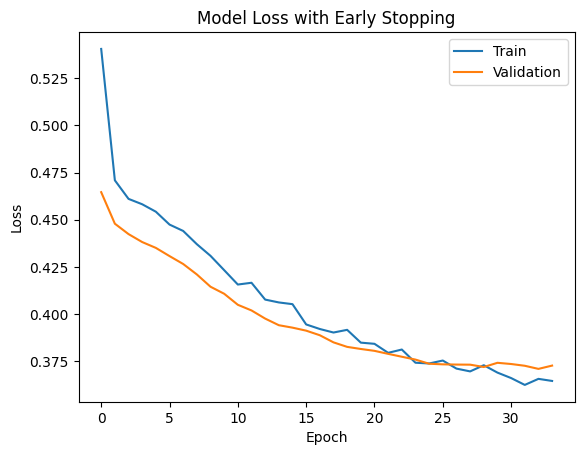

In [925]:
# Plot training loss and validation loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**Observations:**

Towards the end, the training loss continues to decrease slightly while the validation loss remains relatively stable.

This could suggest that the model is starting to overfit.

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


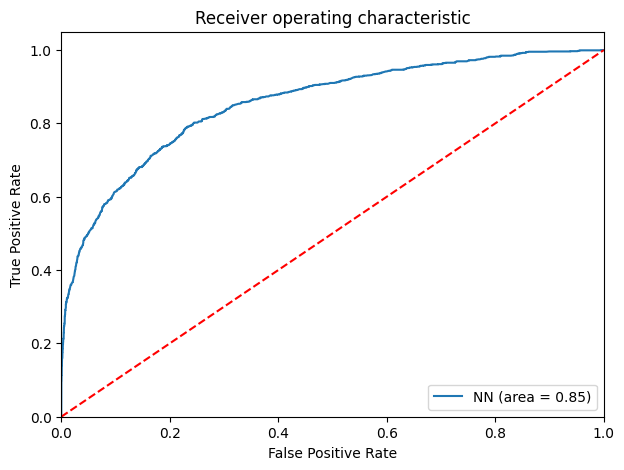

In [926]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train.astype(float), model2.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model2.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


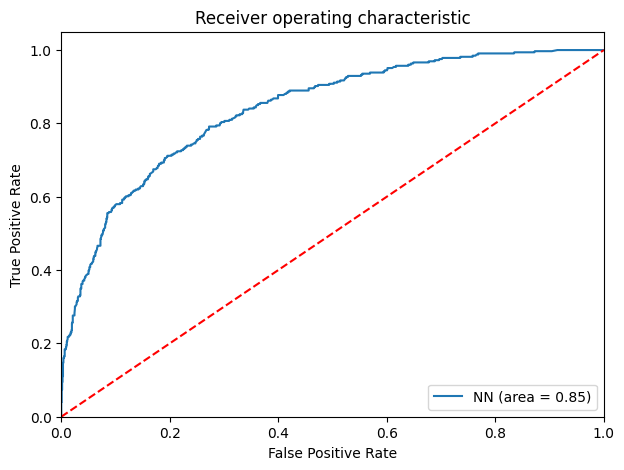

In [927]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model2.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model2.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()


In [928]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train.astype(float), model2.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.16005918


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


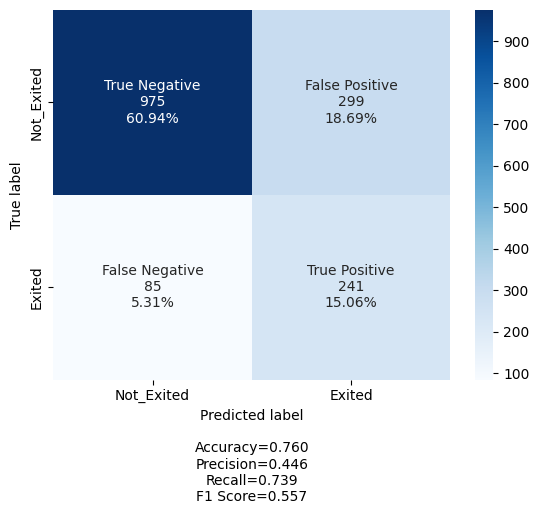

In [929]:
# Predictions on validation set
y_pred_val = model2.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

mat2 = metrics_matrix(cm_val)


# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")

1.  Accuracy: Model 2 has an accuracy of 0.760,

2.  Precision: The precision of Model 2 is 0.446

3.  Recall: The recall of Model 2 is 0.739,

4.  F1 Score: The F1 score of Model 2 is 0.557

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [930]:
from imblearn.over_sampling import SMOTE
sm  = SMOTE(random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

After OverSampling, the shape of train_X: (10192, 11)
After OverSampling, the shape of train_y: (10192,) 



In [931]:
Oversampled_count = y_train_over.value_counts()
Oversampled_count

,count
Exited,
0,5096
1,5096


In [932]:
#Initializing the neural network
model4 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model4.add(Dense(32,activation='relu',input_dim = 11))



# Adding the first hidden layer with 16 neurons with relu as activation functions
model4.add(Dense(16,activation='relu'))



# Adding the second hidden layer with 8 neurons with relu as activation functions
#model2.add(Dense(8,activation='relu'))

# Adding the output layer
model4.add(Dense(1, activation = 'sigmoid'))

In [933]:
model4.summary()

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_137 (Dense)                    │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [934]:
# Complining the model with binary cross entropy as loss and recall. as metrics
model4.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

# Fitting the model on train and test with batch_size of 32, and early stopping
history4 = model4.fit(X_train_over,y_train_over,batch_size=32,epochs=50,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6782 - recall_39: 0.4071 - val_loss: 0.6565 - val_recall_39: 0.6503
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6502 - recall_39: 0.6319 - val_loss: 0.6376 - val_recall_39: 0.6350
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6313 - recall_39: 0.6383 - val_loss: 0.6253 - val_recall_39: 0.6472
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6166 - recall_39: 0.6666 - val_loss: 0.6165 - val_recall_39: 0.6748
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6055 - recall_39: 0.6794 - val_loss: 0.6102 - val_recall_39: 0.6871
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5962 - recall_39: 0.6891 - val_loss: 0.6042 - val_recall_39: 0.6933
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5880 - recall_39: 0.6924 - val_loss: 0.5998 - val_recall_39: 0.7086
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5806 - recall_39: 0.7030 - v

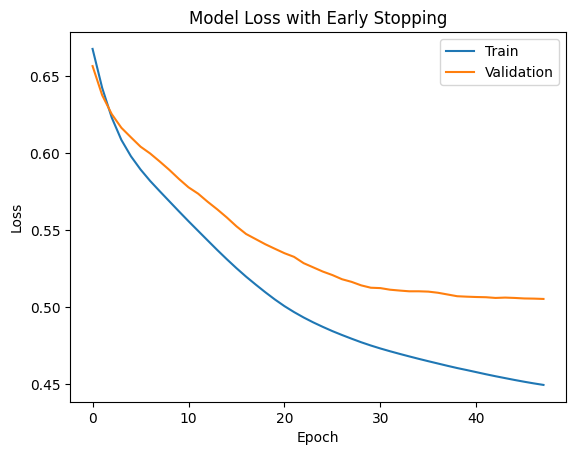

In [935]:
# Plot training loss and validation loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


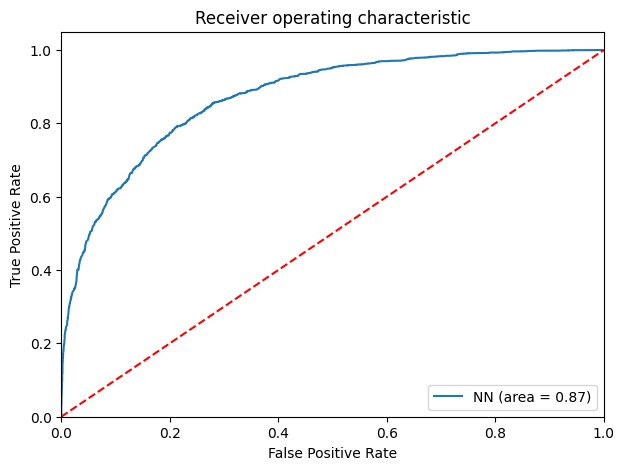

In [936]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train_over.astype(float), model4.predict(X_train_over))
fpr, tpr, thresholds = roc_curve(y_train_over.astype(float),model4.predict(X_train_over))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


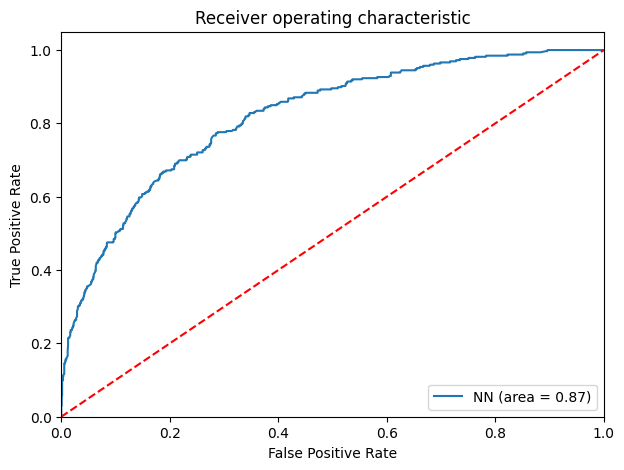

In [937]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model4.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model4.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [938]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train_over.astype(float), model4.predict(X_train_over))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.54996705


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


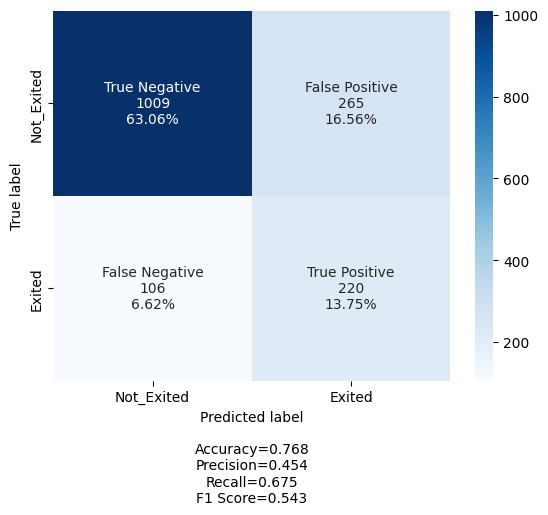

In [939]:
# Predictions on validation set
y_pred_val = model4.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

mat4 = metrics_matrix(cm_val)


# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")

**Observations:**

1.  Accuracy (0.768): Model4 correctly predicted whether a customer will leave the bank or not for about 76.8% of the customers.

2.  Precision (0.454):Out of all the customers that your model4 predicted would leave the bank, only about 45.4% actually left.

3.  Recall (0.675): Model4 correctly identified 67.5% of the total customers who actually left the bank.

4.  F1 Score (0.543)

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [940]:
from imblearn.over_sampling import SMOTE
sm  = SMOTE(random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_over.shape))


After OverSampling, the shape of train_X: (10192, 11)
After OverSampling, the shape of train_y: (10192,) 



In [941]:
Oversampled_count = y_train_over.value_counts()
Oversampled_count

,count
Exited,
0,5096
1,5096


In [942]:
model5 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model5.add(Dense(32,activation='relu',input_dim = 11))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model5.add(Dense(16,activation='relu'))

# Adding the output layer
model5.add(Dense(1, activation = 'sigmoid'))

In [943]:
# Checking the summary of the model.
model5.summary()

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_140 (Dense)                    │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [944]:
# Complining the model with binary cross entropy as loss and recall. as metrics
model5.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

# Fitting the model on train and test with batch_size of 32, and early stopping
history5 = model5.fit(X_train_over,y_train_over,batch_size=32,epochs=50,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])
print("*" * 130)
print("Model has been fit to training data.")

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.6638 - recall_40: 0.5388 - val_loss: 0.5821 - val_recall_40: 0.6350
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5903 - recall_40: 0.6783 - val_loss: 0.5534 - val_recall_40: 0.6319
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5566 - recall_40: 0.7221 - val_loss: 0.5229 - val_recall_40: 0.6564
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5196 - recall_40: 0.7583 - val_loss: 0.5042 - val_recall_40: 0.6380
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4934 - recall_40: 0.7695 - val_loss: 0.4940 - val_recall_40: 0.6288
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4753 - recall_40: 0.7867 - val_loss: 0.4883 - val_recall_40: 0.6196
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4622 - recall_40: 0.7956 - val_loss: 0.4850 - val_recall_40: 0.6411
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4520 - recall_40: 0.8032 - v

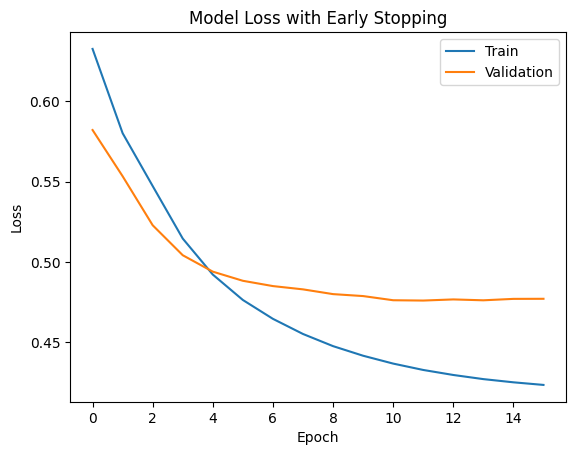

In [945]:
# Plot training loss and validation loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Loss with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


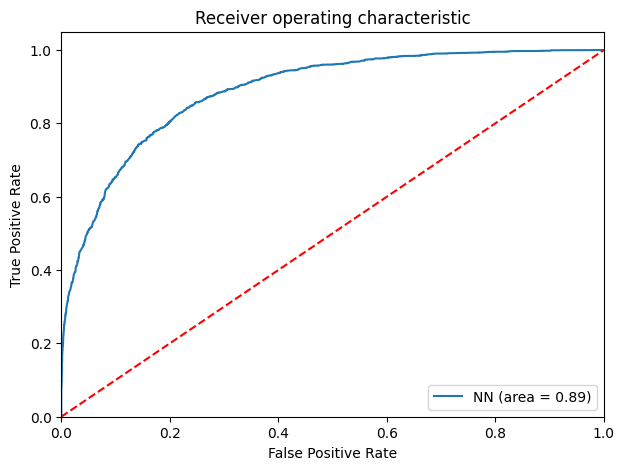

In [946]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train_over.astype(float), model5.predict(X_train_over))
fpr, tpr, thresholds = roc_curve(y_train_over.astype(float),model5.predict(X_train_over))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


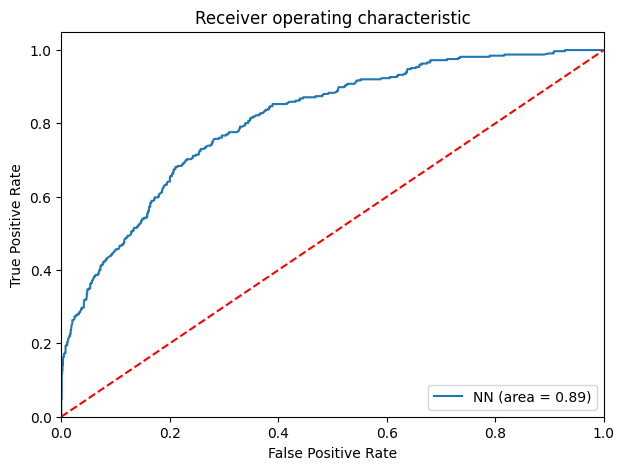

In [947]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model5.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model5.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [948]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train_over.astype(float), model5.predict(X_train_over))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.4574948


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


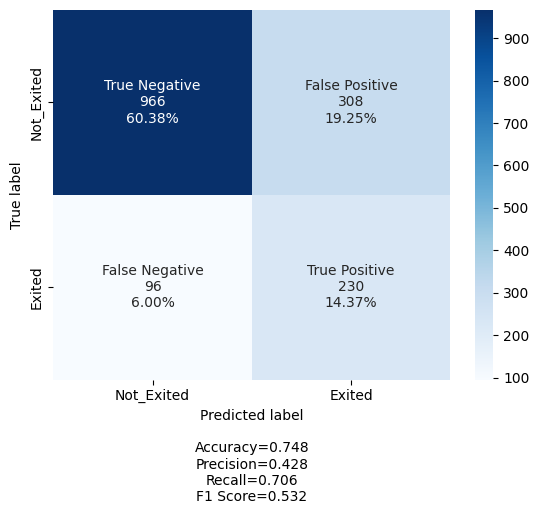

In [949]:
# Predictions on validation set
y_pred_val = model5.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

mat5 = metrics_matrix(cm_val)


# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")

**Observations:**

1.  Accuracy (0.748): Model5 correctly predicted whether a customer will leave the bank or not for about 74.8% of the customers.

2.  Precision (0.428):Out of all the customers that your model5 predicted would leave the bank, only about 42.8% actually left.

3.  Recall (0.706): Model5 correctly identified 70.6% of the total customers who actually left the bank.

4.  F1 Score (0.532)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [950]:
from imblearn.over_sampling import SMOTE
sm  = SMOTE(random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

After OverSampling, the shape of train_X: (10192, 11)
After OverSampling, the shape of train_y: (10192,) 



In [951]:
Oversampled_count = y_train_over.value_counts()
Oversampled_count

,count
Exited,
0,5096
1,5096


In [952]:
#Initializing the neural network
model6 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model6.add(Dense(32,activation='relu',input_dim = 11))

# Adding dropout with ratio of 0.2
model6.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model6.add(Dense(16,activation='relu'))

# Adding dropout with ratio of 0.2
model6.add(Dropout(0.2))

# Adding the second hidden layer with 8 neurons with relu as activation functions
#model2.add(Dense(8,activation='relu'))

# Adding the output layer
model6.add(Dense(1, activation = 'sigmoid'))

In [953]:

model6.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_143 (Dense)                    │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_144 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_145 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [954]:
# Complining the model with binary cross entropy as loss and recall. as metrics
model6.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

# Fitting the model on train and test with batch_size of 32, and early stopping
history6 = model6.fit(X_train_over,y_train_over,batch_size=32,epochs=50,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.6684 - recall_41: 0.5674 - val_loss: 0.6153 - val_recall_41: 0.7147
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6144 - recall_41: 0.6885 - val_loss: 0.5900 - val_recall_41: 0.7025
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5929 - recall_41: 0.7001 - val_loss: 0.5706 - val_recall_41: 0.6933
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5631 - recall_41: 0.7219 - val_loss: 0.5449 - val_recall_41: 0.6810
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5450 - recall_41: 0.7323 - val_loss: 0.5369 - val_recall_41: 0.6718
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5339 - recall_41: 0.7289 - val_loss: 0.5241 - val_recall_41: 0.6595
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5277 - recall_41: 0.7264 - val_loss: 0.5255 - val_recall_41: 0.6902
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5137 - recall_41: 0.7463 - v

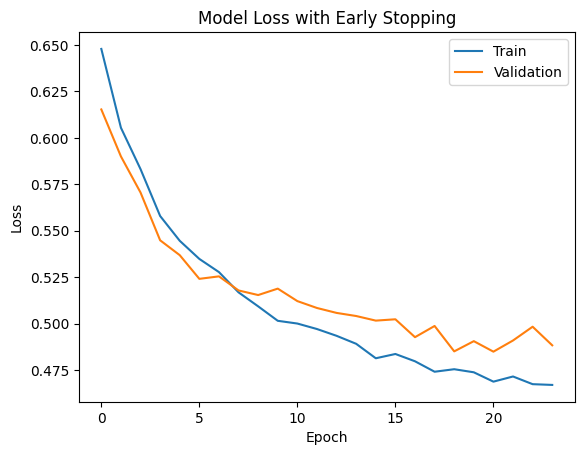

In [955]:
# Plot training loss and validation loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model Loss with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


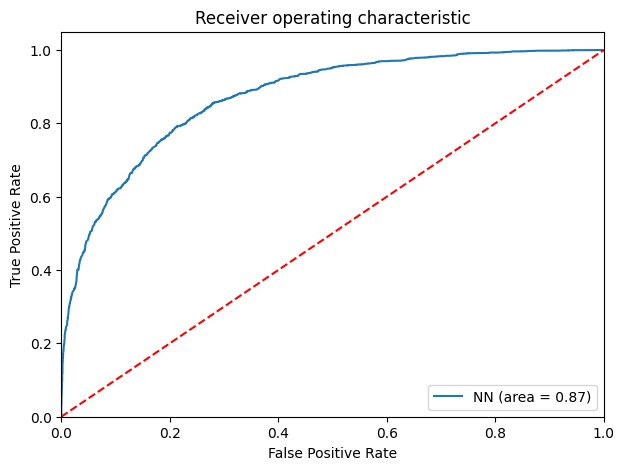

In [956]:
# ROC-AUC on training set
NN_roc_auc_train= roc_auc_score(y_train_over.astype(float), model4.predict(X_train_over))
fpr, tpr, thresholds = roc_curve(y_train_over.astype(float),model4.predict(X_train_over))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


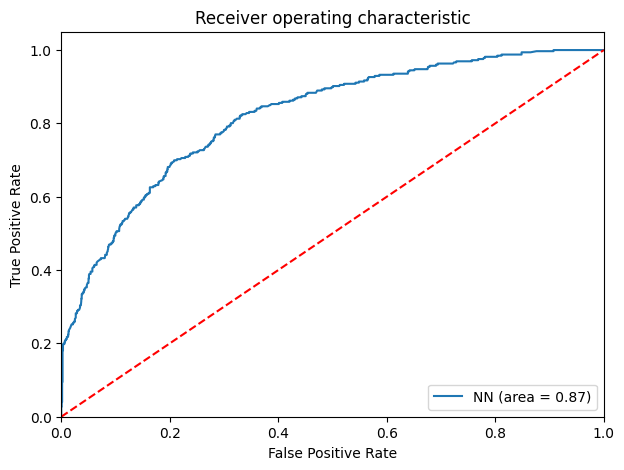

In [957]:
# ROC-AUC on validation set
NN_roc_auc_val = roc_auc_score(y_val.astype(float), model6.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val.astype(float), model6.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="NN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [958]:
# Optimal threshold using AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train_over.astype(float), model6.predict(X_train_over))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.4879487


In [959]:
# Predictions on validation set
y_pred_val = model6.predict(X_val)

# Applying the optimal threshold
y_pred_val_binary = (y_pred_val > optimal_threshold_auc_roc).astype(int)

# Creating confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val_binary)

# Define labels and categories
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]

mat6 = metrics_matrix(cm_val)



50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


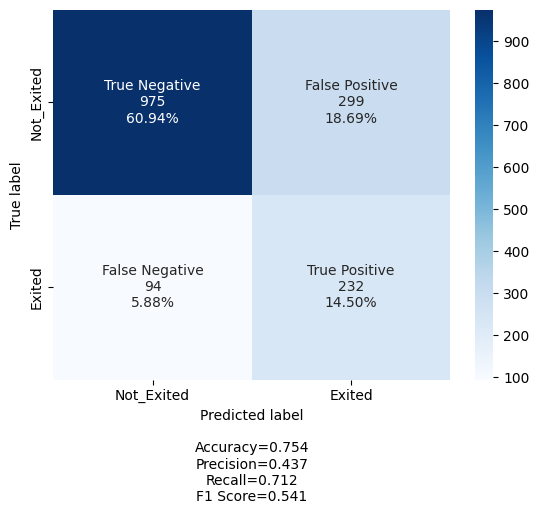

In [960]:

# Plotting confusion matrix
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap="Blues")

**Observations:**

1.  Accuracy (0.754): Model6 correctly predicted whether a customer will leave the bank or not for about 75.4% of the customers.

2.  Precision (0.437):Out of all the customers that your model6 predicted would leave the bank, only about 43.7% actually left.

3.  Recall (0.712): Model6 correctly identified 71.2% of the total customers who actually left the bank.

4.  F1 Score (0.541)

## Model Performance Comparison and Final Model Selection

In [961]:
print("Final Metrics::\n")
print("*" * 100)
print(f"1. SGD Optimizer \n {mat} \n")
print(f"2. Adam Optimizer \n{mat1}\n")
print(f"3. Adam Optimizer and DropOut \n{mat2}\n")
print(f"4. SMOTE and SGD Optimizer\n {mat4}\n")
print(f"5. SMOTE and Adam Optimizer \n{mat5}\n")
print(f"6. SMOTE, Adam Optimizer and Dropout \n{mat6}\n")

print("*" * 100)


Final Metrics::

****************************************************************************************************
1. SGD Optimizer 
   Accuracy=0.761	Precision=0.440	Recall=0.641	F1 Score=0.522 

2. Adam Optimizer 
  Accuracy=0.773	Precision=0.462	Recall=0.696	F1 Score=0.556

3. Adam Optimizer and DropOut 
  Accuracy=0.760	Precision=0.446	Recall=0.739	F1 Score=0.557

4. SMOTE and SGD Optimizer
   Accuracy=0.768	Precision=0.454	Recall=0.675	F1 Score=0.543

5. SMOTE and Adam Optimizer 
  Accuracy=0.748	Precision=0.428	Recall=0.706	F1 Score=0.532

6. SMOTE, Adam Optimizer and Dropout 
  Accuracy=0.754	Precision=0.437	Recall=0.712	F1 Score=0.541

****************************************************************************************************


**Observations:**

We determine that the model incorporating the Adam optimizer and dropout rate of 0.2 (model2) exhibited the highest recall value among all considered models.

 In the context of our specific problem statement, where correctly identifying customers who are likely to leave is crucial, recall serves as an important metric.

So we select model2 as our final model for predicting values on the test set.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


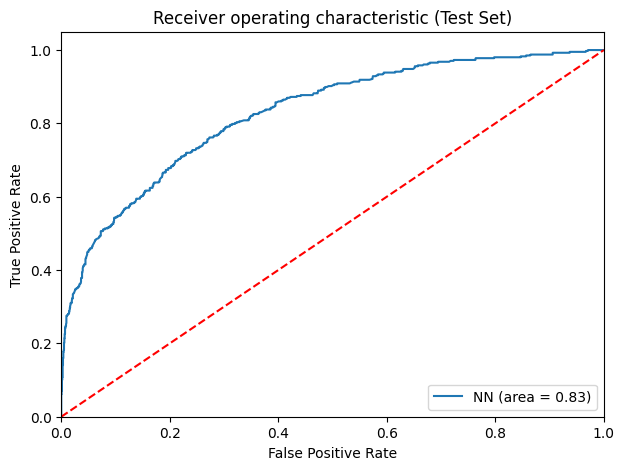

In [962]:
# ROC-AUC on test set using model incorporating the Adam optimizer and dropout rate of 0.2 (model2)
NN_roc_auc_test = roc_auc_score(y_test.astype(float), model2.predict(X_test))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test.astype(float), model2.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr_test, tpr_test, label="NN (area = %0.2f)" % NN_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (Test Set)")
plt.legend(loc="lower right")
plt.show()

**Observations:**

-An AUC score of 0.83 on the test set indicates a relatively good performance of the model in distinguishing between positive and negative instances.

-Therfore the model has a high probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance.

## Actionable Insights and Business Recommendations


*

**Engagement of dormant Members:** The bank might launch a campaign to turn dormant members into active clients. To help these clients get the most out of their accounts, this can entail contacting them with exclusive deals or incentives or offering them individualized financial guidance.

**Product Retention and Diversification:** There is a chance to encourage customers to diversify their product holdings because the minority of customers who only own one product (51%). Create retention techniques to hold on to clients that possess numerous items, like incentives or packaged services.

**Services That Consider Age:** Given that quitting a bank is positively correlated with age, you should think about offering age-specific services or incentives to keep customers in particular age ranges. Customizing services to fit various stages of life could increase client retention.

**Retention based on Tenure:** Higher rates of customer churn are seen among those with shorter tenures—one year and zero years. Use promotions, individualized services, or onboarding programs to win over more customers throughout the early years of their bank relationship.



<font size=6 color='blue'>Power Ahead</font>
___